# Linear Regression with OLS



In [2]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

# Read dataset
df = pd.read_csv("housing_price_data.csv")

df.head()

Saving housing_price_data.csv to housing_price_data.csv


,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99


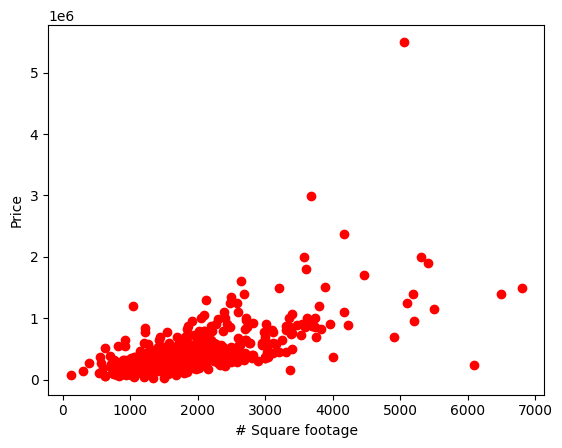

In [8]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values)
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

plt.plot(X, y, 'ro')
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [9]:
# Normalize the house size, e.g., subtract min and divide by (max-min) to ensure 
# The scale is compatible with the bias, which is 1
max_min = X.max(0) - X.min(0)
Xmin = X.min(0)
X = (X-Xmin) / max_min

# Add bias
z=np.ones((len(X),1)) 
X = X.reshape(len(X),1)
X = np.concatenate((z,X), axis=1)                
y = y.reshape(len(X),1) 

# Sort for testing/plotting
Xsort = np.sort(X, axis=0)

print(X.shape)
print(y.shape)

(781, 2)
(781, 1)


## **OLS METHOD**

In [10]:
# Linear Regression by Ordinary Least Squares method
# Compute w_ols

Xt = np.transpose(X)
Xpinv = np.matmul(np.linalg.inv(np.matmul(Xt,X)), Xt)
w_ols = np.matmul(Xpinv, y)



In [11]:
# Predict the price of a 5000 sqft house

sqft = 5000
norm_sqft = (sqft - Xmin)/max_min
price = float(w_ols[0] + norm_sqft*w_ols[1])
print('Estimated price for a {0} sqft house is ${1:.2f}'.format(sqft, price))

Estimated price for a 5000 sqft house is $1301938.08


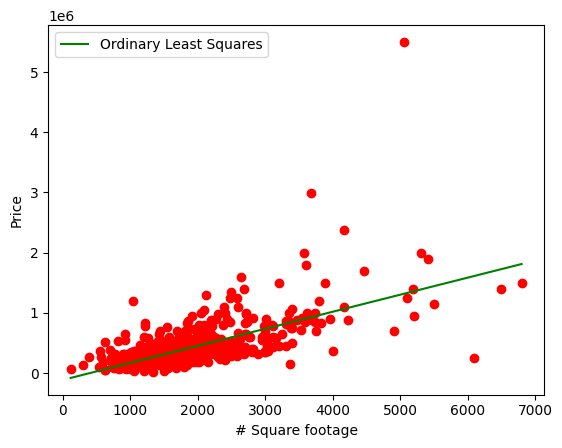

In [12]:
# Plot fitted curve

yhat_ols = np.dot(np.sort(X, axis=0),w_ols)

plt.plot(X[:,1] * max_min + Xmin, y, 'ro')
plt.plot(Xsort[:,1] *max_min + Xmin, yhat_ols, 'g', label="Ordinary Least Squares")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()
